# 20장 슬라이딩 윈도우

슬라이딩 윈도우 (sliding Window)이란 고정 사이즈의 윈도우가 이동하면서 윈도우 내에 있는 데이터를 이용해 문제를 풀이하는 알고리즘을 말합니다.

슬라이딩 윈도우는 투 포인터와 비슷하지만 이와 구분하기 위해 일반적으로 고정 사이즈 윈도우를 사용하는 경우를 슬라이딩 윈도우로 따로 구분하기도 합니다.

또한 주로 정렬된 배열을 대상으로 하는 투 포인터와 달리 슬라이딩 윈도우는 정렬 여부와 관계 없이 활용된다는 차이가 있습니다.

### 75. 최대 슬라이딩 윈도우

배열 nums가 주어졌을 때 k 크기의 슬라이딩 윈도우를 왼쪽 끝까지 이동하면서 최대 슬라이딩 윈도우를 구하라.

- input : nums = [1, 3, -1, -3, 5, 3, 6, 7], k = 3
- output : [3, 3, 5, 5, 6, 7]

- 설명

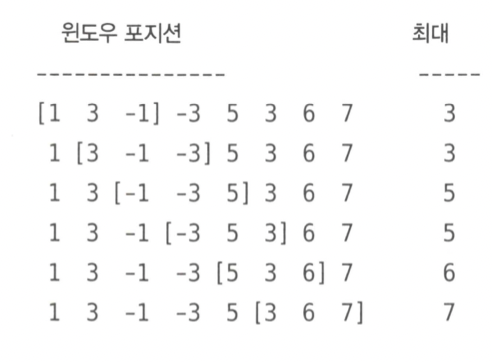

### 풀이 1. 브루트 포스로 계산

In [ ]:
def maxSlidingWindow1(self, nums, k):
    if not nums:
        return nums

    r = []
    for i in range(len(nums) - k + 1):
        r.append(max(nums[i:i + k]))

    return r

In [ ]:
nums = [1, 3, -1, -3, 5, 3, 6, 7]
k = 3

In [ ]:
maxSlidingWindow1(None, nums, k)

[3, 3, 5, 5, 6, 7]

### 풀이 2. 큐를 이용한 최적화

In [ ]:
import collections

def maxSlidingWindow2(self, nums, k):
    results = []
    window = collections.deque() # 큐의 특징 : 선입선출 FIFO, First-In-First-Out
    current_max = float('-inf') # '-inf' : 음의 무한대
    for i, v in enumerate(nums):
        window.append(v)
        if i < k -1:
            continue

        # 새로 추가된 값이 기존 최댓값보다 큰 경우 교체
        if current_max == float('-inf'):
            current_max = max(window)
        elif v > current_max:
            current_max = v

        results.append(current_max)

        # 최댓값이 윈도우에서 빠지면 초기화
        if current_max == window.popleft():
            current_max = float('-inf')

    return results

In [ ]:
maxSlidingWindow2(None, nums, k)

[3, 3, 5, 5, 6, 7]

### 76. 부분 문자열이 포함된 최소 윈도우

문자열 S 와 T를 입력 받아 O(n)에 T의 모든 문자가 포함된 S의 최소 윈도우를 찾아라.

- input : S = "ADOBECODEBANC", T = "ABC"
- output : "BANC"

### 풀이 1. 모든 윈도우 크기를 부르트 포스로 탐색

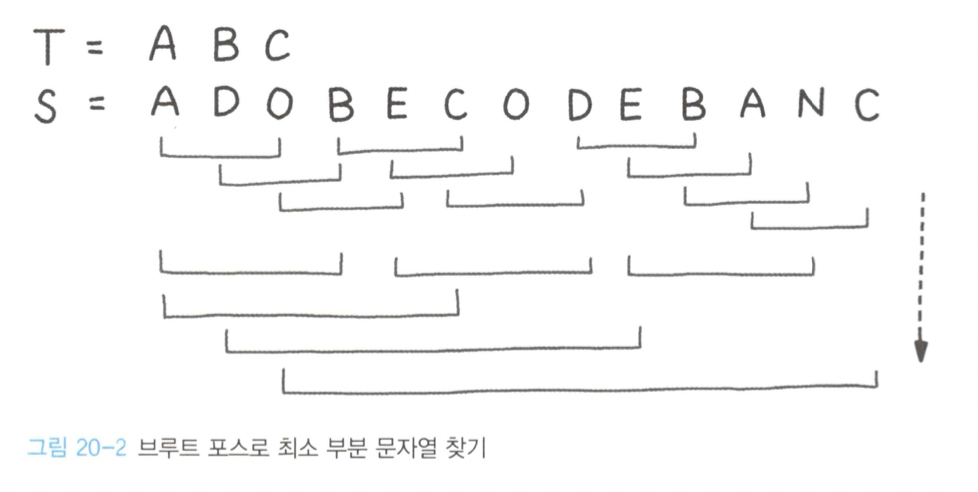

In [ ]:
def minWindow1(self, s, t):
    def contains(s_substr_lst, t_lst):
        for t_elem in t_lst:
            if t_elem in s_substr_lst:
                s_substr_lst.remove(t_elem)
            else:
                return False
        return True

    if not s or not t:
        return ''

    window_size = len(t)

    for size in range(window_size, len(s) + 1):
        for left in range(len(s) - size + 1):
            s_substr = s[left:left + size]
            if contains(list(s_substr), list(t)):
                return s_substr
    return ''

In [ ]:
s = "ADOBECODEBANC"
t = "ABC"

In [ ]:
minWindow1(None, s, t)

'BANC'

### 풀이 2. 투 포인터, 슬라딩 윈도우로 최적화

In [ ]:
def minWindow2(self, s, t):
    need = collections.Counter(t)
    missing = len(t)
    left = start = end = 0

    # 오른쪽 포인터 이동
    for right, char in enumerate(s, 1):
        missing -= need[char] > 0
        need[char] -= 1

        # 필요 문자가 0이면 왼쪽 포인터 이동 판단
        if missing == 0:
            while left < right and need[s[left]] < 0:
                need[s[left]] += 1
                left += 1

            if not end or right - left <= end - start:
                start, end = left, right
            need[s[left]] += 1
            missing += 1
            left += 1
    return s[start:end]


In [ ]:
minWindow2(None, s, t)

'BANC'

### 풀이 3. Counter로 좀 더 편리한 풀이

In [ ]:
def minWindow3(self, s, t):
    t_count = collections.Counter(t)
    current_count = collections.Counter()

    start = float('-inf')
    end = float('inf')

    left = 0
    # 오른쪽 포인터 이동
    for right, char in enumerate(s, 1):
        current_count[char] += 1

        # AND 연산 결과로 왼쪽 포인터 이동 판단
        while current_count & t_count == t_count:
            if right - left < end - start:
                start, end = left, right
            current_count[s[left]] -= 1
            left += 1

    return s[start: end] if end - start <= len(s) else ''

In [ ]:
minWindow3(None, s, t)

'BANC'

### 77. 가장 긴 반복 문자 대체

대문자로 구성된 문자열 s 가 주어졌을 때 k번 만큼의 변경으로 만들 수 있는 연속으로 반복된 문자열의 가장 긴 길이를 출력합니다.

- Input : s = "AAABBC", k = 2
- output : 5
- 설명 : B를 A로 각각 2번 변경하면 길이가 5인 AAAAA를 만들 수 있습니다.

### 풀이 1. 투 포인터 슬라이딩 윈도우, Counter를 모두 이용

오른쪽 포이터에서 왼쪽 포인터 위치를 뺀 다음, 윈도우 내 출현 빈도가 가장 높은 문자의 수를 뺀 값이 k와 같을 수 있는 수 중 가장 큰 최댓값이라 정의 할 수 있습니다. 이를 코드로 표현해보면,

max(right) - min(left) - max_char_n == k

즉, 최대 길이를 찾는 문제이므로, right는 클수록 좋고, left는 작을수록 좋다.

즉, AAABB라는 문자열이 있을 때 A를 B로 바꾸는 것은 3번 B를 A로 바꾸는 것은 2번의 연산이 필요합니다.

In [ ]:
def characterReplacement(self, s, k):
    left = right = 0
    counts = collections.Counter()
    for right in range(1, len(s) + 1):
        counts[s[right - 1]] += 1
        # 가장 흔하게 등장하는 문자 탐색
        max_char_n = counts.most_common(1)[0][1]

        # k 초과시 왼쪽 포인터 이동
        if right - left - max_char_n > k:
            counts[s[left]] -= 1
            left += 1
    return right - left

In [ ]:
s = "AAABBC"
k = 2

In [ ]:
characterReplacement(None, s, k)

5